# Benchmarking CHMMAIRRa and uchime on real and simulated TRB and IGH data

The benchmarking code itself is at [run_benchmarks.jl](../scripts/run_benckmarks.jl). This notebook is just for plotting the results.

Run the benchmarking code to generate the `times.tsv` file like so: 
```
JULIA_NUM_THREADS=AUTO julia +1.10.5 run_benchmarks.jl
```


In [1]:
using Pkg; Pkg.activate("..")
using CSV, DataFrames, CairoMakie

  Activating project at `~/ben/chimera_detection/CHMMAIRRaAnalyses`


In [2]:
# INPUT PATH
benchmark_input_path = "../../outputs/timing_benchmarks/times.tsv"
# OUTPUT DIR
benchmark_output_dir = "../../outputs/timing_benchmarks/"

"../../outputs/timing_benchmarks/"

In [3]:
# setting up some variables
methods = ["CHMMAIRRa", "CHMMAIRRa detailed", "CHMMAIRRa PC", "CHMMAIRRa PC detailed", "USEARCH uchime2_ref", "VSEARCH uchime_ref"]
method2color = Dict("CHMMAIRRa" => "#BF40BF", "CHMMAIRRa detailed" => "#0096FF", "CHMMAIRRa PC" => "red", "CHMMAIRRa PC detailed" => "black", "USEARCH uchime2_ref" => "darkgreen", "VSEARCH uchime_ref" => "orange")
# the three sim datasets are generated in run_benchmarks.jl
# the real datasets are generated in the run_CHMMAIRRa.jl script
# TRB/1A has 91879 sequences, SRR3099387 has 142340
datasets = ["TRB sim 1000", "TRB sim 10000", "TRB sim 100000", "TRB (PRJNA300878/TRB/1A)", "IGH sim 1000", "IGH sim 10000", "IGH sim 100000", "IGG (SRR3099387)"]

8-element Vector{String}:
 "TRB sim 1000"
 "TRB sim 10000"
 "TRB sim 100000"
 "TRB (PRJNA300878/TRB/1A)"
 "IGH sim 1000"
 "IGH sim 10000"
 "IGH sim 100000"
 "IGG (SRR3099387)"

# Timing benchmark plot

In [4]:
times = CSV.read(benchmark_input_path, DataFrame, delim = "\t")

Row,Method,Time (s),Dataset,dataset_ind
,String31,Float64,String31,Int64
1,CHMMAIRRa,0.57951,TRB sim 1000,1
2,CHMMAIRRa_detailed,0.891744,TRB sim 1000,1
3,CHMMAIRRa_PC,6.17,TRB sim 1000,1
4,CHMMAIRRa_PC_detailed,11.73,TRB sim 1000,1
5,USEARCH_uchime2_ref,0.33,TRB sim 1000,1
6,VSEARCH_uchime_ref,0.1,TRB sim 1000,1
7,CHMMAIRRa,0.718338,IGH sim 1000,5
8,CHMMAIRRa_detailed,1.25539,IGH sim 1000,5
9,CHMMAIRRa_PC,6.46,IGH sim 1000,5


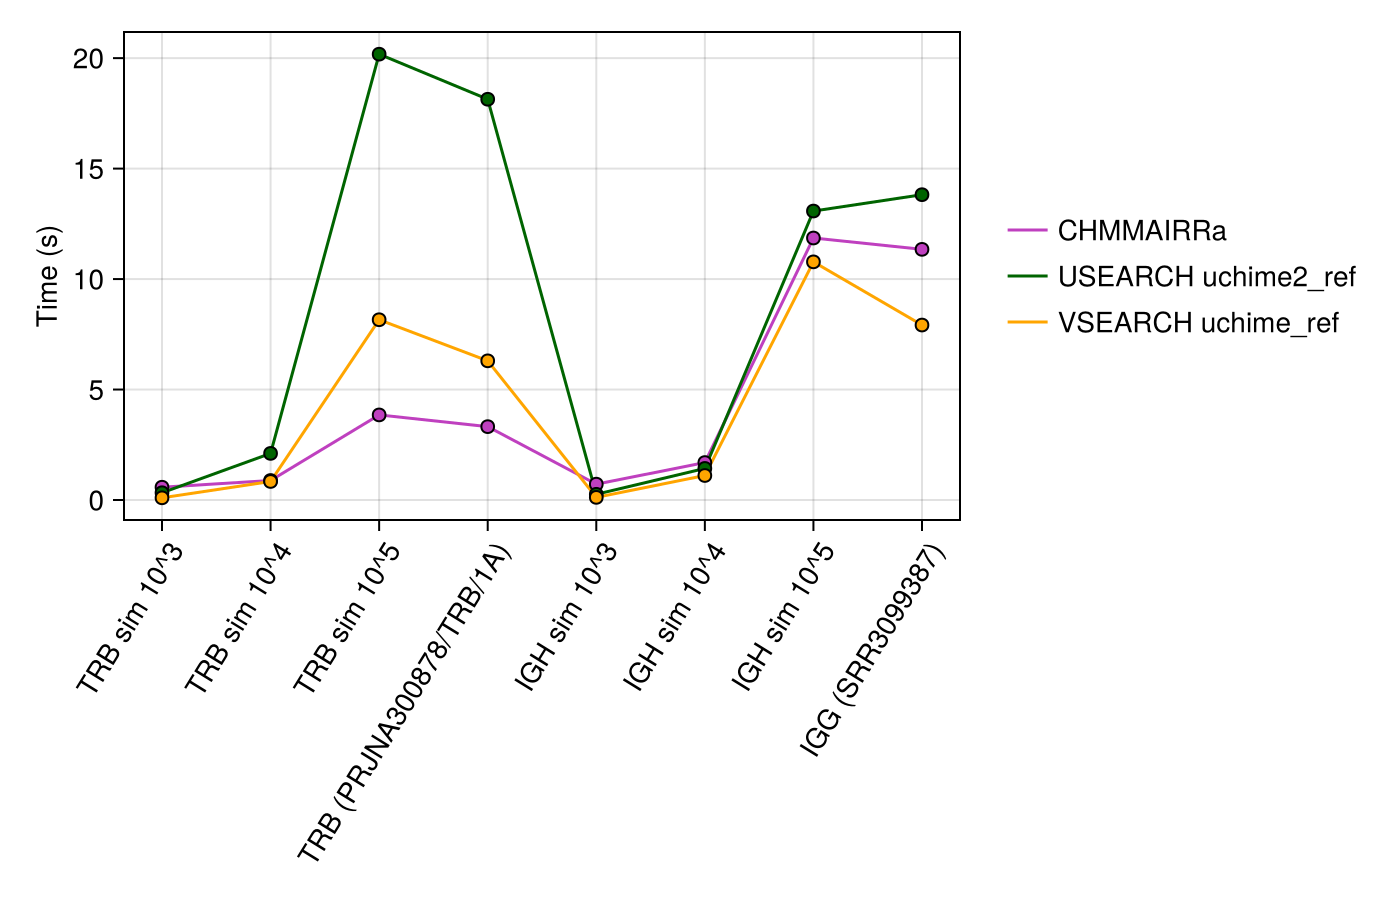

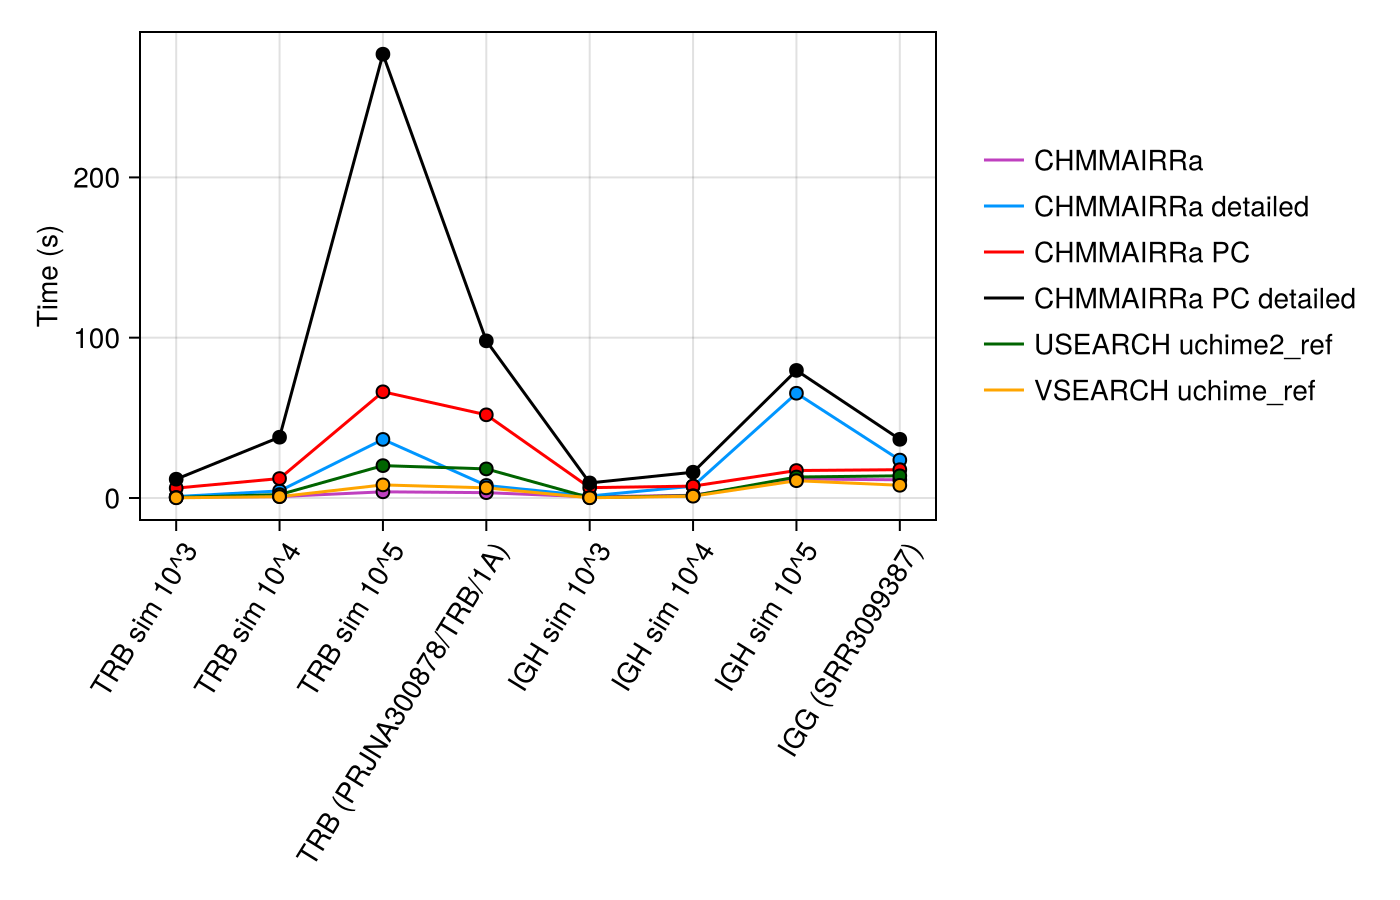

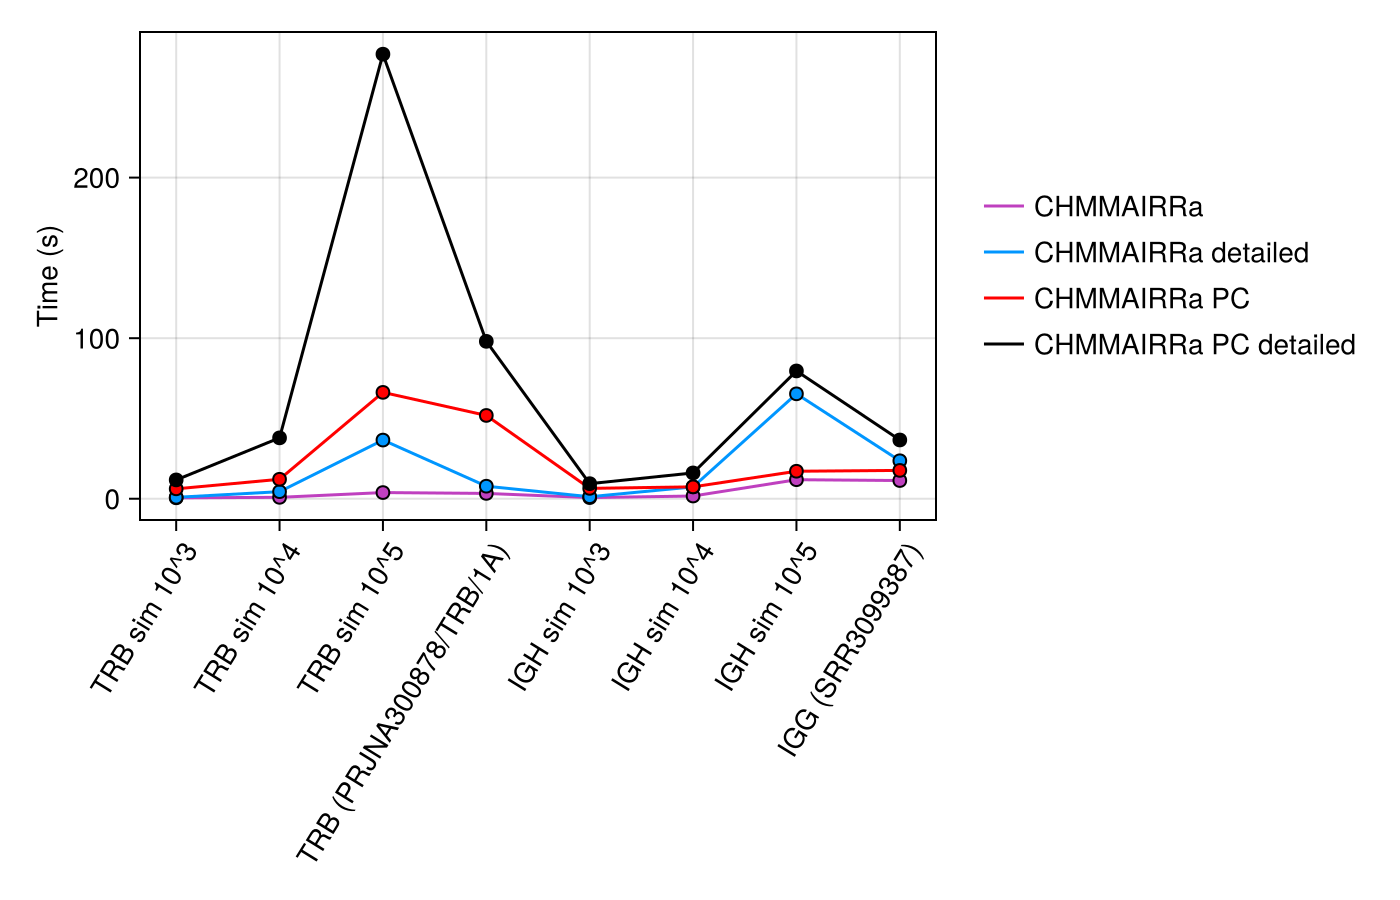

CairoMakie.Screen{SVG}


In [5]:
# modifying labels for the plot to look a bit nicer
correct_method_spacing = Dict("CHMMAIRRa" => "CHMMAIRRa", "CHMMAIRRa_detailed" => "CHMMAIRRa detailed", "CHMMAIRRa_PC" => "CHMMAIRRa PC", "CHMMAIRRa_PC_detailed" => "CHMMAIRRa PC detailed", "USEARCH_uchime2_ref" => "USEARCH uchime2_ref", "VSEARCH_uchime_ref" => "VSEARCH uchime_ref")
times[!,"Method"] = map(x -> correct_method_spacing[x], times[!,"Method"])
times[!,"Dataset"] = map(x -> replace(x, "100000" => "10^5", "10000" => "10^4", "1000" => "10^3"), times[!,"Dataset"])
dataset_labels = ["TRB sim 10^3", "TRB sim 10^4", "TRB sim 10^5", "TRB (PRJNA300878/TRB/1A)", "IGH sim 10^3", "IGH sim 10^4", "IGH sim 10^5", "IGG (SRR3099387)"]

# final plot for the paper. Includes VSEARCH, USEARCH, and CHMMAIRRa (not detailed and not package compiled)
times_limited = filter(row -> (row.Method ∈ ["CHMMAIRRa", "USEARCH uchime2_ref", "VSEARCH uchime_ref"]), times)
timing_benchmark_f = Figure(size = (700, 450))
timing_benchmark = CairoMakie.Axis(timing_benchmark_f[1,1], ylabel = "Time (s)", xticklabelrotation = 45, xticks = (1:length(datasets), dataset_labels))
for ((method,), group) in pairs(groupby(times_limited, :Method))
    sort!(group, :dataset_ind)
    CairoMakie.lines!(timing_benchmark, group.dataset_ind, group[!,"Time (s)"], color = method2color[method], label = method)
end
CairoMakie.scatter!(timing_benchmark, times_limited.dataset_ind, times_limited[!,"Time (s)"], color = [method2color[el] for el in times_limited.Method], strokewidth = 1)

leg = Legend(timing_benchmark_f[1, 2], timing_benchmark, framevisible = false)
display(timing_benchmark_f)
save(joinpath(benchmark_output_dir, "timing_benchmark.svg"), timing_benchmark_f)

# complete plot with all benchmarks. Includes VSEARCH, USEARCH, and CHMMAIRRa (detailed and package compiled as well)
timing_benchmark_f = Figure(size = (700, 450))
timing_benchmark = CairoMakie.Axis(timing_benchmark_f[1,1], ylabel = "Time (s)", xticklabelrotation = 45, xticks = (1:length(datasets), dataset_labels))
for ((method,), group) in pairs(groupby(times, :Method))
    sort!(group, :dataset_ind)
    CairoMakie.lines!(timing_benchmark, group.dataset_ind, group[!,"Time (s)"], color = method2color[method], label = method)
end
CairoMakie.scatter!(timing_benchmark, times.dataset_ind, times[!,"Time (s)"], color = [method2color[el] for el in times.Method], strokewidth = 1)

leg = Legend(timing_benchmark_f[1, 2], timing_benchmark, framevisible = false)
display(timing_benchmark_f)
save(joinpath(benchmark_output_dir, "timing_benchmark_extras.svg"), timing_benchmark_f)

# CHMMAIRRa benchmarks only plot
times_chmmairra = filter(row -> occursin("CHMMAIRRa", row.Method), times)
timing_benchmark_f = Figure(size = (700, 450))
timing_benchmark = CairoMakie.Axis(timing_benchmark_f[1,1], ylabel = "Time (s)", xticklabelrotation = 45, xticks = (1:length(datasets), dataset_labels))
for ((method,), group) in pairs(groupby(times_chmmairra, :Method))
    sort!(group, :dataset_ind)
    CairoMakie.lines!(timing_benchmark, group.dataset_ind, group[!,"Time (s)"], color = method2color[method], label = method)
end
CairoMakie.scatter!(timing_benchmark, times_chmmairra.dataset_ind, times_chmmairra[!,"Time (s)"], color = [method2color[el] for el in times_chmmairra.Method], strokewidth = 1)

leg = Legend(timing_benchmark_f[1, 2], timing_benchmark, framevisible = false)
display(timing_benchmark_f)
save(joinpath(benchmark_output_dir, "timing_benchmark_chmairra.svg"), timing_benchmark_f)